In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [22]:
WB_B_t1_adv = np.load('../AdvGAN/samples/WB-B-t1-adv.npy')
WB_B_t1_clean = np.load('../AdvGAN/samples/WB-B-t1-clean.npy')
WB_B_t1_label = np.load('../AdvGAN/samples/WB-B-t1-label.npy')
print(WB_B_t0_label.shape)
#print(WB_B_t0_label[img])

(50789, 10, 10)


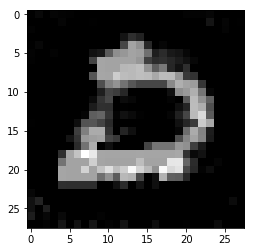

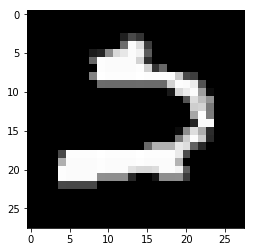

In [4]:
img = 35
plt.figure()
plt.imshow((WB_B_t1_adv[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.show()
plt.close()
plt.figure()
plt.imshow((WB_B_t1_clean[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.show()
plt.close()

# defense-gan

In [10]:
ls results/reconstruct/

rec_t0-adv-defensegan-5000.npz  WB-B-t0-adv-defensegan-50789.npz
rec_t1-adv-defensegan-5000.npz  WB-B-t1-adv-defensegan-51596.npz
rec_t2-adv-defensegan-5000.npz  WB-B-t2-adv-defensegan-53540.npz
rec_t3-adv-defensegan-5000.npz  WB-B-t3-adv-defensegan-53239.npz
rec_t4-adv-defensegan-5000.npz  WB-B-t4-adv-defensegan-53567.npz
rec_t5-adv-defensegan-5000.npz  WB-B-t5-adv-defensegan-51903.npz
rec_t6-adv-defensegan-5000.npz  WB-B-t6-adv-defensegan-52352.npz
rec_t7-adv-defensegan-5000.npz  WB-B-t7-adv-defensegan-47669.npz
rec_t8-adv-defensegan-5000.npz  WB-B-t8-adv-defensegan-41324.npz
rec_t9-adv-defensegan-5000.npz  WB-B-t9-adv-defensegan-53810.npz


In [2]:
#WB_B_t0_defensegan = np.load('results/reconstruct-1000/WB-B-t0-adv-defensegan-1000.npz')['arr_0']
'''

WB_B_t1_defensegan = np.load('results/reconstruct/WB-B-t1-adv-defensegan-51596.npz')['arr_0']
WB_B_t2_defensegan = np.load('results/reconstruct/WB-B-t2-adv-defensegan-53540.npz')['arr_0']
WB_B_t3_defensegan = np.load('results/reconstruct/WB-B-t3-adv-defensegan-53239.npz')['arr_0']
WB_B_t1_adv = np.load('../AdvGAN/samples/WB-B-t1-adv.npy')
WB_B_t1_clean = np.load('../AdvGAN/samples/WB-B-t1-clean.npy')
WB_B_t1_label = np.load('../AdvGAN/samples/WB-B-t1-label.npy')
WB_B_t2_adv = np.load('../AdvGAN/samples/WB-B-t2-adv.npy')
WB_B_t2_clean = np.load('../AdvGAN/samples/WB-B-t2-clean.npy')
WB_B_t2_label = np.load('../AdvGAN/samples/WB-B-t2-label.npy')
WB_B_t3_adv = np.load('../AdvGAN/samples/WB-B-t3-adv.npy')
WB_B_t3_clean = np.load('../AdvGAN/samples/WB-B-t3-clean.npy')
WB_B_t3_label = np.load('../AdvGAN/samples/WB-B-t3-label.npy')
'''

WB_B_t4_defensegan = np.load('results/reconstruct/WB-B-t4-adv-defensegan-53567.npz')['arr_0']
WB_B_t5_defensegan = np.load('results/reconstruct/WB-B-t5-adv-defensegan-51903.npz')['arr_0']
WB_B_t6_defensegan = np.load('results/reconstruct/WB-B-t6-adv-defensegan-52352.npz')['arr_0']
WB_B_t4_adv = np.load('../AdvGAN/samples/WB-B-t4-adv.npy')
WB_B_t4_clean = np.load('../AdvGAN/samples/WB-B-t4-clean.npy')
WB_B_t4_label = np.load('../AdvGAN/samples/WB-B-t4-label.npy')
WB_B_t5_adv = np.load('../AdvGAN/samples/WB-B-t5-adv.npy')
WB_B_t5_clean = np.load('../AdvGAN/samples/WB-B-t5-clean.npy')
WB_B_t5_label = np.load('../AdvGAN/samples/WB-B-t5-label.npy')
WB_B_t6_adv = np.load('../AdvGAN/samples/WB-B-t6-adv.npy')
WB_B_t6_clean = np.load('../AdvGAN/samples/WB-B-t6-clean.npy')
WB_B_t6_label = np.load('../AdvGAN/samples/WB-B-t6-label.npy')

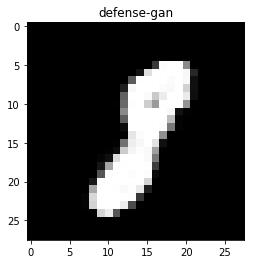

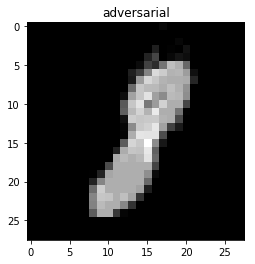

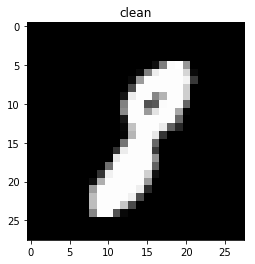

In [17]:
img = 35
plt.figure()
plt.imshow((WB_B_t1_defensegan[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.title('defense-gan')
plt.show()
plt.close()
plt.figure()
plt.imshow((WB_B_t1_adv[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.title('adversarial')
plt.show()
plt.close()
plt.imshow((WB_B_t1_clean[img,] * 255).astype(np.int).reshape(28,28), cmap='gray')
plt.title('clean')
plt.show()
plt.close()

675


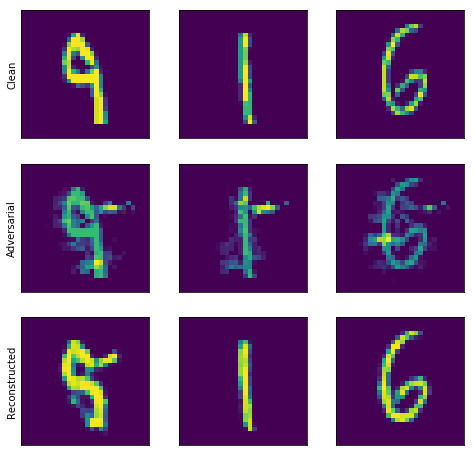

In [17]:
fig=plt.figure(figsize=(8,8))

col=3
row=3
img = np.random.randint(1000)
print(img)

for i in range(0,row):
    fig.add_subplot(row,col,i+1)
    if i==0:
        plt.ylabel("Clean")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((WB_B_t5_clean[img+i,] * 255).astype(np.int).reshape(28,28))
for i in range(0,row):    
    fig.add_subplot(row,col,row+i+1)
    if i==0:
        plt.ylabel("Adversarial")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((WB_B_t5_adv[img+i,] * 255).astype(np.int).reshape(28,28))

for i in range(0,row):  
    fig.add_subplot(row,col,2*row+i+1)
    if i==0:
        plt.ylabel("Reconstructed")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((WB_B_t5_defensegan[img+i,] * 255).astype(np.int).reshape(28,28))
#plt.show()
plt.savefig('defense-gan-vs-adv-gan-plots-target-5-'+str(img)+'.pdf')

## CNN

In [7]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/gunmachine/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 412us/step - loss: 0.2657 - acc: 0.9185 - val_loss: 0.0527 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 19s 319us/step - loss: 0.0852 - acc: 0.9742 - val_loss: 0.0417 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0644 - acc: 0.9809 - val_loss: 0.0371 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 19s 322us/step - loss: 0.0507 - acc: 0.9845 - val_loss: 0.0358 - val_acc: 0.9867
Epoch 5/12
60000/60000 [==============================] - 20s 326us/step - loss: 0.0453 - acc: 0.9865 - val_loss: 0.0309 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 20s 330us/step - loss: 0.0405 - acc: 0.9875 - val_loss: 0.0280 - val_acc: 0.9903
Epoch 7/12
60000/60000 [===================

## score

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02763359983114933
Test accuracy: 0.9911


In [24]:
WB_B_t1_label = keras.utils.to_categorical(WB_B_t1_label, num_classes)
score = model.evaluate(WB_B_t1_clean, WB_B_t1_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.007530013376316848
Test accuracy: 0.9979843398713079


In [25]:
score = model.evaluate(WB_B_t1_adv, WB_B_t1_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2258842670785355
Test accuracy: 0.48881696255061596


In [27]:
length = WB_B_t1_defensegan.shape[0]
score = model.evaluate(WB_B_t1_defensegan, WB_B_t1_label[:length], verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.8622583763344775
Test accuracy: 0.582815533985212


In [31]:
#F = keras.models.load_model('../AdvGAN/models/Classifier-A.h5')

In [ ]:
F = keras.models.load_model('../AdvGAN/models/Classifier-A.h5')

In [29]:
import keras.backend as K

classifier_name = ['A', 'B', 'C']

for cn in classifier_name:
    F = keras.models.load_model('../AdvGAN/models/Classifier-' + cn + '.h5')
    length = WB_B_t1_defensegan.shape[0]
    score = F.evaluate(WB_B_t1_defensegan, WB_B_t1_label[:length], verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

TypeError: ('Keyword argument not understood:', u'data_format')

In [1]:
import cPickle

In [2]:
data_path = 'data/cache/mnist_pkl/train/feats.pkl'
with open(data_path) as f:
    train_images_gan = cPickle.load(f)
    train_images_label = cPickle.load(f)

In [3]:
train_images_gan.shape

(49950, 28, 28, 1)

In [4]:
train_images_label.shape

(49950,)

# Adv-GAN

In [6]:
rec_t0 = np.load('../cleverhans/adv-cw-original.npz')
print(rec_t0["x"].shape)
#print(WB_B_t0_label[img])

(60000, 28, 28, 1)


In [8]:
rec_t0["x"][0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
print(rec_t0["y"].shape)

(60000, 10)


# Adv-GAN-Defense-GAN

In [32]:
target = 5

adv = np.load('../AdvGAN/samples/WB-B-t%d-adv.npy' % target)
ape = np.load('../APEGAN/reconstruct/rec_t%d.npy' % target)
print(adv.shape)
clean = np.load('../AdvGAN/samples/WB-B-t%d-clean.npy' % target)
data = np.load('../DefenseGAN/results/reconstruct/rec_t%d-adv-defensegan-5000.npz' % target)
rec = data["arr_0"]

print(rec.shape)

(51903, 28, 28, 1)
(5000, 28, 28, 1)


890
1
2
3
5
6
7
9
10
11
13
14
15


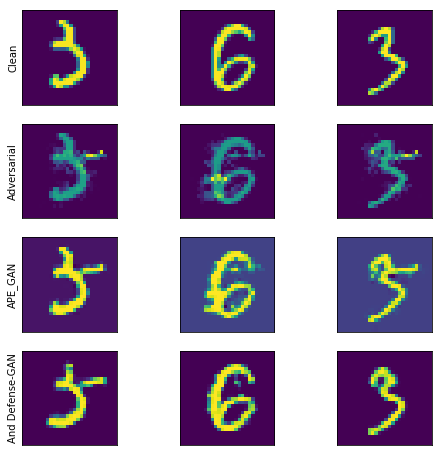

In [33]:
fig=plt.figure(figsize=(8,8))

col=3
row=4
img = np.random.randint(1000)
print(img)

for i in range(0,col):
    fig.add_subplot(row,col,i+1)
    print(i+1)
    if i==0:
        plt.ylabel("Clean")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((clean[img+i,] * 255).astype(np.int).reshape(28,28))

for i in range(0,col):    
    fig.add_subplot(row,col,col+i+1)
    print(row+i+1)
    if i==0:
        plt.ylabel("Adversarial")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((adv[img+i,] * 255).astype(np.int).reshape(28,28))

for i in range(0,col):  
    fig.add_subplot(row,col,2*col+i+1)
    print(2*row+i+1)
    if i==0:
        plt.ylabel("APE_GAN")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((ape[img+i,] * 255).astype(np.int).reshape(28,28))
    
for i in range(0,col):  
    fig.add_subplot(row,col,3*col+i+1)
    print(3*row+i+1)
    if i==0:
        plt.ylabel("And Defense-GAN")
    plt.xticks([])
    plt.yticks([])
    plt.imshow((rec[img+i,] * 255).astype(np.int).reshape(28,28))

#plt.show()
plt.savefig('defense-gan-ape-gan-adv-gan-plots-target-5-'+str(img)+'.pdf')